Dans cet exercice, vous êtes **Data Scientist** dans une **start-up de la EdTech**, nommée ***academy***, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

**Mark**, votre manager, vous a convié à une réunion pour vous présenter le projet d’**expansion à l’international** de l’entreprise.  
Il vous confie **une première mission d’analyse exploratoire**, pour déterminer si les données sur l’éducation de la Banque mondiale permettent d’enrichir la réflexion autour du projet d’expansion.

Mark aimerait explorer les pays avec un **fort potentiel de clients** pour les services de ***academy***, et voir comment ce potentiel pourrait évoluer.

Vous allez répondre à la demande de Mark en suivant l’ensemble des exercices entièrement guidés.  
À la fin des exercices, vous aurez réussi à déterminer si ces jeux de données peuvent fournir des *insights* guidant ***academy*** à décider dans **quels pays s’implanter**.

---

### 🎯 Objectif de ce premier exercice :

Ce premier exercice vous fait mener **une première analyse en surface** des différents jeux de données.

---

### 🧩 Étapes à suivre :

1. 📂 Chargez les données dans votre Notebook  
2. 🧠 Collectez des informations basiques sur chaque jeu de données  
3. 🧹 Réalisez un premier nettoyage

In [1]:
# 📌 1. Import générale des librairies des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
# 📌 2. Chargement du fichier
file_path = "dataprojet2/EdStatsCountry.csv"
df = pd.read_csv(file_path)

In [3]:
# 📌 3. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 4. Définition d’une ligne
print("\n🧾 Chaque ligne représente un pays identifié par son code (Country Code) étoffée par de mulitples données et méta-données (notamment économiques)")

# 📌 5. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

🔍 Aperçu du fichier :


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN



🧾 Chaque ligne représente un pays identifié par son code (Country Code) étoffée par de mulitples données et méta-données (notamment économiques)

📐 Dimensions : 241 lignes × 32 colonnes.


In [4]:
# 📌 6. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")


📎 Nombre de doublons : 0


In [5]:
# 📌 7. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 8. Describe
display(df.describe())


🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 31']


,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000



🔍 Pourcentage de valeurs manquantes par colonne :


National accounts reference year                     86.7
Alternative conversion factor                        80.5
Other groups                                         75.9
Latest industrial data                               55.6
Vital registration complete                          53.9
External debt Reporting status                       48.5
Latest household survey                              41.5
Latest agricultural census                           41.1
Lending category                                     40.2
Special Notes                                        39.8
PPP survey year                                      39.8
Source of most recent Income and expenditure data    33.6
Government Accounting concept                        33.2
Latest water withdrawal data                         25.7
Balance of Payments Manual in use                    24.9
IMF data dissemination standard                      24.9
Latest trade data                                    23.2
SNA price valu

<Axes: >

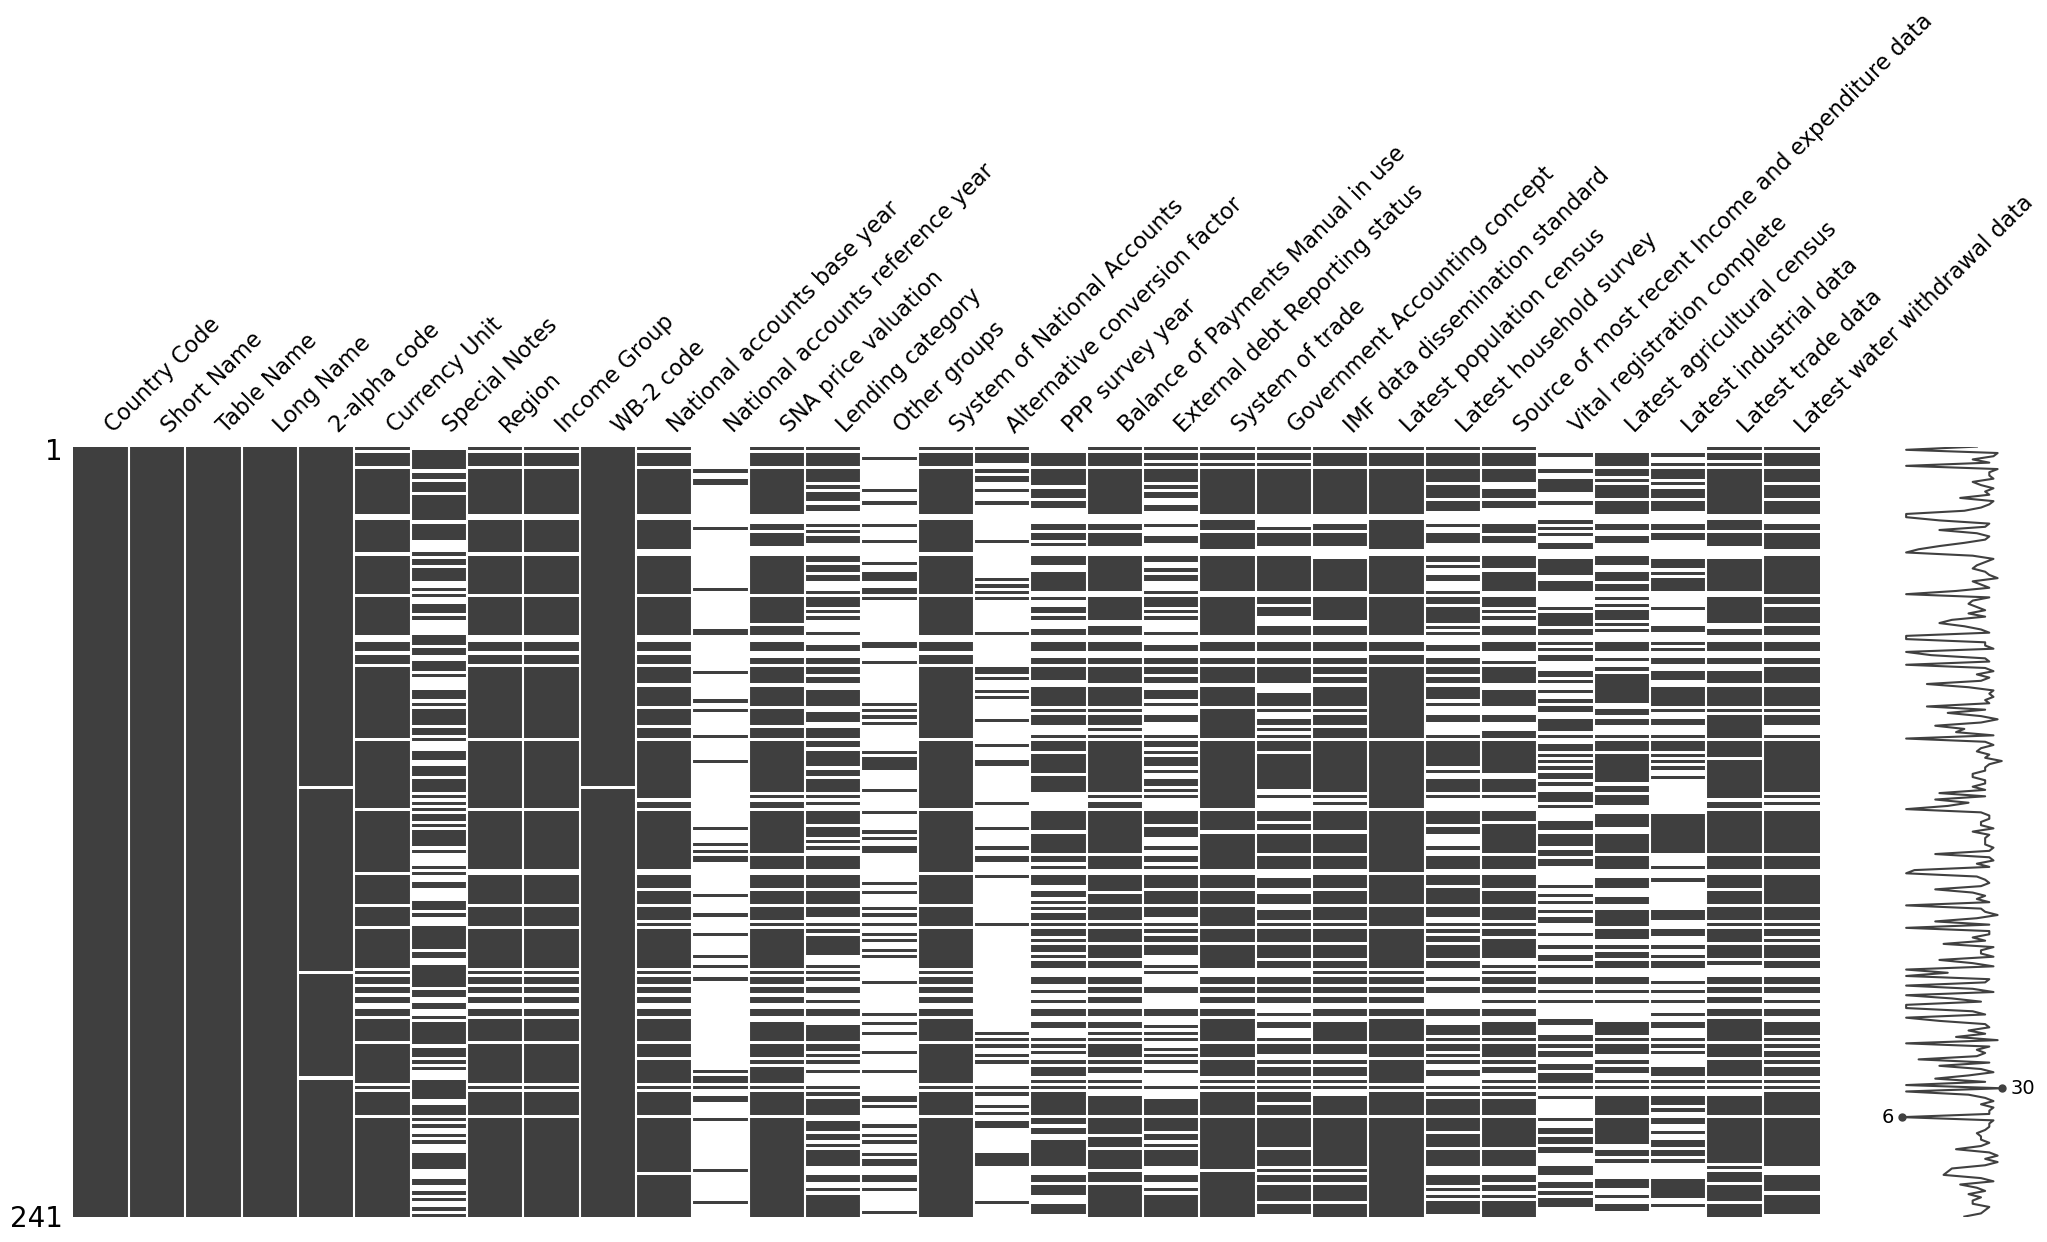

In [6]:
# 📌 9. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# `df.isnull()` - Crée un dataframe booléen de même forme que `df`, où `True` indique une valeur manquante (NaN) 
# et `False` indique une valeur non manquante.
# `.mean()` - Calcule la moyenne de ces valeurs booléennes pour chaque colonne, ce qui donne la proportion de valeurs manquantes (entre 0 et 1).
# `* 100` - Multiplie ces proportions par 100 pour les convertir en pourcentages.
# `.round(1)` - Arrondit les pourcentages à 1 décimale pour un affichage plus propre.
# `.sort_values(ascending=False)` - Trie les pourcentages par ordre décroissant, 
# de sorte que les colonnes avec le plus de valeurs manquantes apparaissent en premier.


# 📌 9.bis Valeurs manquantes avec missingno
%matplotlib inline
msno.matrix(df.sample(df.shape[0]))



In [21]:
# 📌 10. Statistiques descriptives des colonnes numériques 
# Sélection des colonnes numériques contenant uniquement des années (entiers à 4 chiffres)
colonnes_annees = []
for col in df.select_dtypes(include='number').columns:
    valeurs = df[col].dropna().unique()
    if all((val % 1 == 0) and (1900 <= val <= 2100) for val in valeurs):
        colonnes_annees.append(col)
        
print("\n Colonnes numériques identifiées (attention  ce sont  des années) :", colonnes_annees)

#for col in colonnes_annees:
#    plt.figure(figsize=(8, 4))
#    sns.countplot(x=df[col].dropna().astype(int), color='steelblue')
#    plt.title(f"Distribution des années pour : {col}")
#    plt.xlabel("Année")
#    plt.ylabel("Nombre de pays")
#    plt.xticks(rotation=45)
#    plt.grid(axis='y')
#    plt.tight_layout()
#    plt.show()

#for col in colonnes_annees:
#    print(f"\n🔹 {col}")
#    print("Années disponibles :", sorted(df[col].dropna().unique().astype(int)))
#   print(df[col].value_counts().sort_index())




 Colonnes numériques identifiées (attention  ce sont  des années) : []


In [22]:
# 📌 11. Analyse des colonnes catégorielles

# Affiche les types de colonnes
display(df.dtypes)




Series Code                            object
Topic                                  object
Indicator Name                         object
Short definition                       object
Long definition                        object
Periodicity                            object
Base Period                            object
Other notes                            object
Aggregation method                     object
Limitations and exceptions             object
General comments                       object
Source                                 object
Statistical concept and methodology    object
Development relevance                  object
Related source links                   object
dtype: object

In [24]:
# 📌 11.bis Sélectionne les colonnes catégorielles (de type object)
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Boucle sur chaque colonne catégorielle pour afficher les occurrences
for col in df_cat.columns:
    print(f"\n📌 Colonne '{col}' :")
    print(df_cat[col].value_counts())



🔠 Nombre d'occurrences des valeurs catégorielles :

📌 Colonne 'Series Code' :
BAR.NOED.1519.FE.ZS            1
SP.POP.0710.FE.UN              1
SP.POP.0710.TO.UN              1
SP.POP.0711.FE.UN              1
SP.POP.0711.MA.UN              1
                              ..
LO.PASEC.MAT5.LO.MA            1
LO.PASEC.MAT5.MA               1
LO.PASEC.REA.2                 1
LO.PASEC.REA.2.FE              1
XGDP.56.FSGOV.FDINSTADM.FFD    1
Name: Series Code, Length: 3665, dtype: int64

📌 Colonne 'Topic' :
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                

In [25]:
# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)

,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
Series Code,3665,BAR.NOED.1519.FE.ZS,1
Topic,37,Learning Outcomes,1046
Indicator Name,3665,Barro-Lee: Percentage of female population age...,1
Short definition,1170.0,NaN,1509.0
Long definition,2060,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,215
Periodicity,2.0,NaN,3566.0
Base Period,5.0,NaN,3351.0
Other notes,15.0,NaN,3113.0
Aggregation method,4.0,NaN,3618.0
Limitations and exceptions,10.0,NaN,3651.0


## 🌍 Hypothèse sémantique des colonnes – `EdStatsCountry.csv`

Chaque ligne représente **un pays unique** décrit par des métadonnées géographiques, économiques et administratives, telles que définies par la Banque mondiale.

| 🏷️ Colonne                                | 💬 Hypothèse de signification |
|-------------------------------------------|-------------------------------|
| **Country Code**                          | Code ISO 3166-1 alpha-3 à 3 lettres (ex. *FRA*, *KEN*), identifiant unique du pays. |
| **Short Name**                            | Nom abrégé du pays (ex. *France*, *Kenya*). |
| **Table Name**                            | Nom utilisée dans les tables de base de données connnexes. |
| **Long Name**                             | Dénomination longue du pays (ex. *French Republic*). |
| **2-alpha code**                          | Code ISO 3166-1 alpha-2 à 2 lettres (ex. *FR*, *KE*). |
| **Currency Unit**                         | Nom de la devise nationale (ex. *Euro*, *Kenyan Shilling*). |
| **Special Notes**                         | Remarques spécifiques sur la qualité ou le contexte des données. |
| **Region**                                | Région géographique selon la Banque mondiale (ex. *Europe & Central Asia*). |
| **Income Group**                          | Groupe de revenu du pays selon la Banque mondiale (*Low*, *Lower middle*, *Upper middle*, *High income*). |
| **WB-2 code**                             | Code interne de la Banque mondiale à 2 lettres (souvent identique au `2-alpha code`). |
| **National accounts base year**           | Année de base des comptes nationaux (ex. *2015*). |
| **National accounts reference year**      | Année de référence utilisée pour les prix constants. |
| **SNA price valuation**                   | Type de prix utilisé dans le Système de Comptabilité Nationale (*market prices*, *basic prices*). |
| **Lending category**                      | Catégorie d’éligibilité aux financements Banque mondiale (*IBRD*, *IDA*, *Blend*, etc.). |
| **Other groups**                          | Autres classifications auxquelles appartient le pays (*OECD*, *LDC*, *Fragile States*, etc.). |
| **System of National Accounts**           | Version du SNA utilisée (ex. *SNA 1993*, *SNA 2008*). |
| **Alternative conversion factor**         | Facteur alternatif de conversion des monnaies, si disponible. |
| **PPP survey year**                       | Année de la dernière enquête sur la parité de pouvoir d'achat. |
| **Balance of Payments Manual in use**     | Édition du manuel utilisée pour la balance des paiements (*BPM5*, *BPM6*). |
| **External debt Reporting status**        | Statut de la déclaration de la dette extérieure (ex. *Reported*, *No data*). |
| **System of trade**                       | Méthode utilisée pour comptabiliser le commerce international (*General*, *Special trade system*). |
| **Government Accounting concept**         | Méthode comptable du gouvernement (*Cash basis*, *Accrual basis*, etc.). |
| **IMF data dissemination standard**       | Niveau d’adhésion aux standards statistiques du FMI (*SDDS*, *GDDS*). |
| **Latest population census**              | Année du dernier recensement officiel de population. |
| **Latest household survey**               | Année de la dernière enquête ménage/niveau de vie. |
| **Source of most recent Income and expenditure data** | Source utilisée pour les données les plus récentes sur les revenus et dépenses. |
| **Vital registration complete**           | Indique si les registres d’état civil sont complets (*Yes*, *No*, ou manquant). |
| **Latest agricultural census**            | Année du dernier recensement agricole. |
| **Latest industrial data**                | Année des dernières données industrielles disponibles. |
| **Latest trade data**                     | Année des dernières données sur le commerce extérieur. |
| **Latest water withdrawal data**          | Année des dernières données sur les prélèvements d’eau. |


---

### ✅ Synthèse

- 📌 Ce fichier est une **base de métadonnées pays**.
- Utile comme **référentiel principal** pour relier des indicateurs macroéconomiques, sociaux et environnementaux.
- Chaque colonne contient un **attribut structurant ou descriptif** utilisé par la Banque mondiale pour contextualiser ses séries temporelles.
- Si un pays ne posède pas de région, on dira que c'est une faux pays (cf. exercice suivant)

In [26]:

# 📌 1. Chargement du fichier
file_path = "dataprojet2/EdStatsCountry-Series.csv"
df = pd.read_csv(file_path)

# 📌 2. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 3. Définition d’une ligne
print("\n🧾 Chaque ligne représente un indicateur de suivi (statistique) pour un pays donné..")

# 📌 4. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 6. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 7. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 8. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 9. Statistiques descriptives des colonnes numériques
print("\n🧾 Non applicable.")


# 📌 10. Analyse des colonnes catégorielles
display(df.dtypes)
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN



🧾 Chaque ligne représente un indicateur de suivi (statistique) pour un pays donné..

📐 Dimensions : 613 lignes × 4 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 3     100.0
CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 3']

🧾 Non applicable.


CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object


🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
CountryCode,211,MDA,18
SeriesCode,21,SP.POP.TOTL,211
DESCRIPTION,97,Data sources : United Nations World Population...,154


## 📘 Hypothèse sémantique des colonnes – `EdStatsCountrySeries.csv`

Chaque ligne représente **un indicateur de suivi** (statistique) **pour un pays donné**.  
C’est un fichier pivot reliant les pays aux séries statistiques proposées par la Banque mondiale.

| 🏷️ Colonne | 💬 Hypothèse de signification |
|------------|-------------------------------|
| **CountryCode** | Code ISO à 3 lettres représentant le pays concerné (ex. *FRA*, *KEN*). |
| **SeriesCode** | Code identifiant une série statistique (ex. *SE.TER.ENRR* pour taux de scolarisation dans le supérieur). |
| **DESCRIPTION** | Description textuelle de l’indicateur suivi. Sert à comprendre la signification du `SeriesCode`. |

---

### ✅ Synthèse :

- Ce fichier sert à **documenter** les indicateurs éducatifs.
- C’est une table d’association **Pays ↔ Série ↔ Description détaillée**.



In [27]:
# 📌 1. Import des librairies
# déjà fait



# 📌 2. Chargement du fichier
file_path = "dataprojet2/EdStatsData.csv"
df = pd.read_csv(file_path)

# 📌 3. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 4. Définition d’une ligne
print("\n🧾 Chaque ligne représente pour chaque pays, une  série d'indicateur et leur évolution au cours des ans.")

# 📌 5. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 6. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 7. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 8. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 9. Statistiques descriptives des colonnes numériques
# display(df.dtypes)

# df_numeric = df.select_dtypes(include='number')
# print("\n📈 Statistiques descriptives (numériques) :")
# display(df_numeric.describe().T)


# 📌 10. Analyse des colonnes catégorielles
display(df.dtypes)
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🧾 Chaque ligne représente pour chaque pays, une  série d'indicateur et leur évolution au cours des ans.

📐 Dimensions : 886930 lignes × 70 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 69       100.0
2017              100.0
2016               98.1
1971               96.0
1972               96.0
                  ...  
2010               72.7
Country Code        0.0
Indicator Code      0.0
Indicator Name      0.0
Country Name        0.0
Length: 70, dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 69']


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2080              float64
2085              float64
2090              float64
2095              float64
2100              float64
Length: 69, dtype: object


🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
Country Name,242,Arab World,3665
Country Code,242,ARB,3665
Indicator Name,3665,"Adjusted net enrolment rate, lower secondary, ...",242
Indicator Code,3665,UIS.NERA.2,242


## 📘 Hypothèse sémantique des colonnes – `EdStatsData.csv`

Ce fichier contient les **valeurs numériques des indicateurs éducatifs** fournis par la Banque mondiale.  
Chaque ligne représente une mesure pour **un pays, un indicateur et une année**.

| 🏷️ Colonne | 💬 Signification hypothétique |
|------------|-------------------------------|
| **Country Name** | Nom complet du pays concerné (ex. *France*, *India*). |
| **Country Code** | Code ISO à 3 lettres (ex. *FRA*, *IND*), identifiant unique du pays. |
| **Indicator Name** | Nom descriptif de l’indicateur (ex. *School enrollment, tertiary (% gross)*). |
| **Indicator Code** | Code court de l’indicateur (ex. *SE.TER.ENRR*). Sert de clé pour faire des jointures avec `EdStatsCountrySeries.csv`. |
| **1960**, **1961**, ..., **2022** | Une colonne par année : valeurs numériques (taux, population,  etc.). Valeurs souvent manquantes pour les années anciennes ou récentes. |

---

### ✅ Remarques :

- 📌 **Colonnes de type temporel** : de 1960 à 2022 (selon la version).
- 📌 C’est un **format large**, appelé *wide format* :
    - Une ligne = un pays + un indicateur
    - Les années sont des colonnes.
- Pour la visualisation ou modélisation, il est souvent nécessaire de **convertir ce format en "long format"** avec `pd.melt()`.

---

### 📊 Exemple :

Une ligne contient par exemple :

- `Country Name` = "Brazil"  
- `Indicator Name` = "School enrollment, primary (% gross)"  
- `1960` = 83.1  
- `1961` = 84.5  
- ...  
- `2020` = 97.2

Cela signifie que le **taux brut de scolarisation primaire** au Brésil était de **83.1% en 1960**, 97.2% en 2020, etc.

---


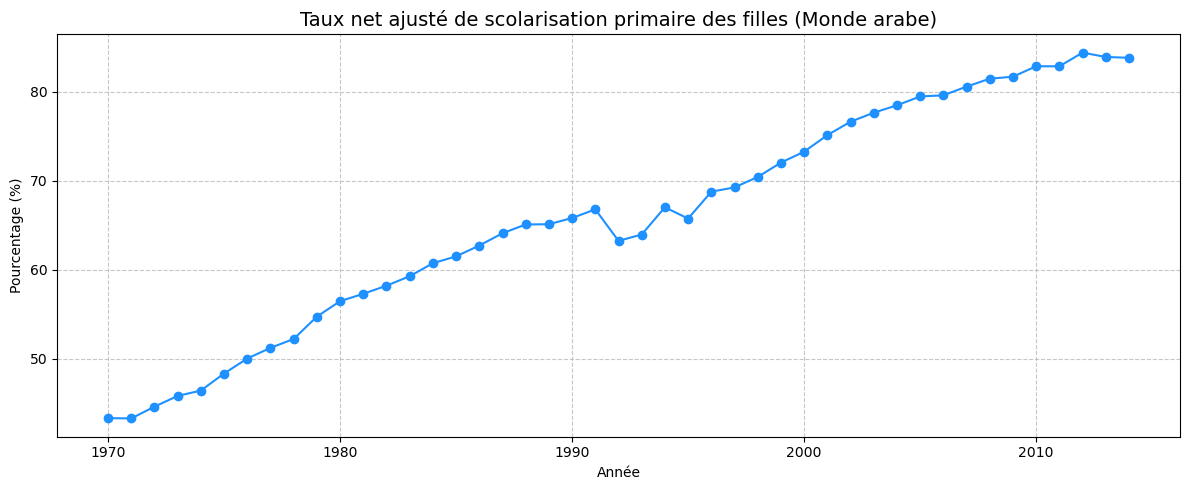

In [28]:
# pas besoin import pandas as pd
# import matplotlib.pyplot as plt

# 📥 Chargement du fichier (en chunk si lourd)
file_path = "dataprojet2/EdStatsData.csv"
chunks = pd.read_csv(file_path, chunksize=10_000)

# 🎯 Filtrage exact pour Arab World & l'indicateur demandé
target_country = "Arab World"
target_indicator = "Adjusted net enrolment rate, primary, female (%)"

# 🔍 Recherche dans les chunks
for chunk in chunks:
    subset = chunk[
        (chunk['Country Name'] == target_country) &
        (chunk['Indicator Name'] == target_indicator)
    ]
    if not subset.empty:
        df_arab = subset
        break

# 🔢 Extraction des colonnes d'années (1970 à 2014)
years = [str(y) for y in range(1970, 2015)]
df_arab_years = df_arab[years].T
df_arab_years.columns = ['Taux (%)']
df_arab_years.index.name = 'Année'
df_arab_years = df_arab_years.dropna()
df_arab_years.index = df_arab_years.index.astype(int)

# 📊 Visualisation
plt.figure(figsize=(12, 5))
plt.plot(df_arab_years.index, df_arab_years['Taux (%)'], marker='o', color='dodgerblue')
plt.title("Taux net ajusté de scolarisation primaire des filles (Monde arabe)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Pourcentage (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


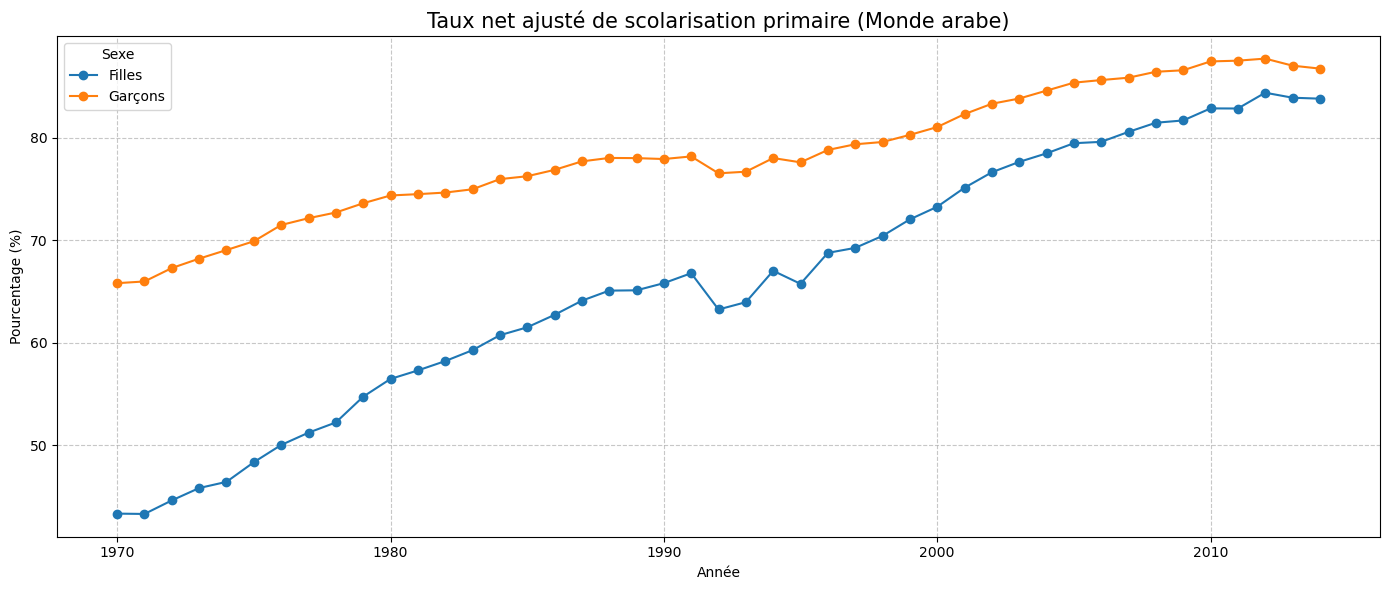

In [29]:
# déjà fait import pandas as pd
# import matplotlib.pyplot as plt

# 📥 Chargement en chunks car fichier volumineux
file_path = "dataprojet2/EdStatsData.csv"
chunks = pd.read_csv(file_path, chunksize=10_000)

# 🎯 Paramètres de recherche
target_country = "Arab World"
indicators = {
    "Filles": "Adjusted net enrolment rate, primary, female (%)",
    "Garçons": "Adjusted net enrolment rate, primary, male (%)"
}

data = {}

# 🔍 Parcours des chunks pour extraire les 2 indicateurs
for chunk in chunks:
    for label, indicator in indicators.items():
        if label not in data:
            subset = chunk[
                (chunk['Country Name'] == target_country) &
                (chunk['Indicator Name'] == indicator)
            ]
            if not subset.empty:
                data[label] = subset
    if len(data) == len(indicators):
        break

# 📆 Extraction des colonnes d'années
years = [str(y) for y in range(1970, 2015)]

plt.figure(figsize=(14, 6))

for label, df in data.items():
    df_years = df[years].T
    df_years.columns = ['Taux (%)']
    df_years.index.name = 'Année'
    df_years = df_years.dropna()
    df_years.index = df_years.index.astype(int)

    plt.plot(df_years.index, df_years['Taux (%)'], marker='o', label=label)

# 🖼️ Mise en forme
plt.title("Taux net ajusté de scolarisation primaire (Monde arabe)", fontsize=15)
plt.xlabel("Année")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Sexe")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 📊 Analyse du taux net ajusté de scolarisation primaire (Monde arabe)

### 1️⃣ Observation pour les filles (Graphique 1)
- **Progression continue** de 1970 (≈43 %) à 2014 (≈84 %).
- Accélération notable **entre 1970 et le début des années 2000**, traduisant une amélioration significative de l’accès des filles à l’éducation primaire.
- Quelques **ralentissements** ou **stagnations** visibles autour des années 1990 et 2010.
- La tendance globale reste **fortement positive**, montrant un rattrapage important sur la période.

---

### 2️⃣ Comparaison filles vs garçons (Graphique 2)
- En 1970, **écart important** : garçons ≈ 66 %, filles ≈ 43 % (≈ 23 points de différence).
- Les **deux courbes progressent** sur la période, mais celle des filles augmente **plus rapidement**, réduisant progressivement l’écart.
- À partir des années 2000, l’écart se réduit à **moins de 5 points**, traduisant un rapprochement marqué en termes de scolarisation.
- Les garçons maintiennent néanmoins un **taux légèrement supérieur** tout au long de la période.
- Les deux sexes atteignent des niveaux élevés (> 80 %) en fin de période, signe d’une **quasi-universalisation** de l’accès à l’éducation primaire.

---

### 3️⃣ Points clés à retenir
- **Réduction significative de l’écart de genre** en éducation primaire dans le Monde arabe.
- **Amélioration globale** de l’accès à l’école pour tous, avec une dynamique particulièrement forte pour les filles.
- Les politiques éducatives et initiatives pour promouvoir l’éducation des filles semblent avoir eu un **impact mesurable**.
- Malgré tout, un **petit écart persistant** en faveur des garçons demeure.

---

**En résumé :**  
Entre 1970 et 2014, le Monde arabe a connu une forte progression de la scolarisation primaire, particulièrement pour les filles, réduisant fortement l’inégalité entre sexes. La tendance générale est à l’universalisation, même si la parité parfaite n’est pas encore totalement atteinte.


In [30]:
# 📌 1. Chargement du fichier
file_path = "dataprojet2/EdStatsFootnote.csv"
df = pd.read_csv(file_path)

# 📌 2. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 3. Définition d’une ligne
print("\n🧾 Chaque ligne présente pour une série statistique d'un pays une annotation technique renseignant comment a été effectuée cette série.")

# 📌 4. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 5. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 6. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 7. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 7. Statistiques descriptives des colonnes numériques
print("\n📈 Statistiques descriptives (numériques) : non applicable")


# 📌 9 Analyse des colonnes catégorielles
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN



🧾 Chaque ligne présente pour une série statistique d'un pays une annotation technique renseignant comment a été effectuée cette série.

📐 Dimensions : 643638 lignes × 5 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 4     100.0
CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 4']

📈 Statistiques descriptives (numériques) : non applicable

🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
CountryCode,239,LIC,7320
SeriesCode,1558,SH.DYN.MORT,9226
Year,56,YR2004,27128
DESCRIPTION,9102,Country Data,191188


## 📘 Hypothèse sémantique des colonnes – `EdStatsFootNote.csv`

Ce fichier contient les **annotations techniques** (footnotes) concernant certaines données statistiques sur l'éducation, fournies par la Banque mondiale.  
Il permet de **qualifier** les données présentes dans des jeux comme `EdStatsData.csv` lorsque celles-ci sont **estimées**, **modélisées** ou **issues de sources alternatives**.

---

### 🧾 Dictionnaire des variables

| 🏷️ Colonne       | 💬 Signification probable |
|------------------|---------------------------|
| **CountryCode**  | Code ISO alpha-3 du pays (ex : `ABW` pour Aruba). |
| **SeriesCode**   | Code unique d’un indicateur éducatif (ex. `SE.PRE.ENRL.FE` pour le taux d'inscription des filles à la maternelle). |
| **Year**         | Année à laquelle la note s’applique, au format `YRxxxx` (ex. `YR2001` pour 2001). |
| **DESCRIPTION**  | Texte indiquant le type de note (par exemple : `"Country estimation."` signifie que la donnée est une estimation et non une mesure directe). |

---

### 🧠 Utilité du fichier

- Il permet d’**annoter les données chiffrées** avec des précisions sur leur origine ou qualité.
- Il est utile pour **filtrer** les valeurs estimées ou douteuses lors des analyses.
- Peut être utilisé en **jointure** avec d’autres jeux de données (comme `EdStatsData.csv`) via les colonnes `CountryCode`, `SeriesCode` et `Year`.

---

### 🧩 Exemple d'interprétation

```text
CountryCode: ABW  
SeriesCode : SE.PRE.ENRL.FE  
Year       : YR2001  
DESCRIPTION: Country estimation.

➡️ Interprétation : En 2001, pour Aruba (ABW), la donnée liée au taux d’inscription des filles à la maternelle est une estimation nationale.

In [31]:


# 📌 1. Chargement du fichier
file_path = "dataprojet2/EdStatsSeries.csv"
df = pd.read_csv(file_path)

# 📌 2. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 3. Définition d’une ligne
print("\n🧾 Chaque ligne traduit les codes d’indicateur en intitulés clairs avec des données contextuelles.")

# 📌 5. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 4. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 5. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 6. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 7. Statistiques descriptives des colonnes numériques
print("\n📈 Statistiques descriptives (numériques) : non applicable")


# 📌 8 Analyse des colonnes catégorielles
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🧾 Chaque ligne traduit les codes d’indicateur en intitulés clairs avec des données contextuelles.

📐 Dimensions : 3665 lignes × 21 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 20                            100.0
Notes from original source             100.0
License Type                           100.0
Related indicators                     100.0
Other web links                        100.0
Unit of measure                        100.0
Development relevance                   99.9
General comments                        99.6
Limitations and exceptions              99.6
Statistical concept and methodology     99.4
Aggregation method                      98.7
Periodicity                             97.3
Related source links                    94.1
Base Period                             91.4
Other notes                             84.9
Short definition                        41.2
Topic                                    0.0
Source                                   0.0
Long definition                          0.0
Indicator Name                           0.0
Series Code                              0.0
dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unit of measure', 'Notes from original source', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

📈 Statistiques descriptives (numériques) : non applicable

🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
Series Code,3665,BAR.NOED.1519.FE.ZS,1
Topic,37,Learning Outcomes,1046
Indicator Name,3665,Barro-Lee: Percentage of female population age...,1
Short definition,1170.0,NaN,1509.0
Long definition,2060,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,215
Periodicity,2.0,NaN,3566.0
Base Period,5.0,NaN,3351.0
Other notes,15.0,NaN,3113.0
Aggregation method,4.0,NaN,3618.0
Limitations and exceptions,10.0,NaN,3651.0


## 📘 Hypothèse sémantique des colonnes – `EdStatsSeries.csv`

Ce fichier contient la **métadonnée des indicateurs éducatifs** utilisés dans les jeux de données précédents.

Chaque **ligne** représente un **indicateur unique**, identifié par son code. Ce fichier sert de **référentiel explicatif** pour comprendre les codes présents dans les fichiers de données, comme `IndicatorCode` dans `EdStatsData.csv`.

---

### 📋 Dictionnaire hypothétique des colonnes

| 🏷️ Colonne                    | 💬 Signification probable |
|------------------------------|---------------------------|
| **Series Code**              | Code unique de l’indicateur (ex : `BAR.NOED.1519.FE.ZS`). Il est utilisé pour faire le lien avec les valeurs dans `EdStatsData.csv`. |
| **Topic**                    | Thématique ou domaine de l’indicateur (ex : `Attainment`, `Access`, `Teachers`, etc.). |
| **Indicator Name**           | Nom complet de l’indicateur (ex : `Barro-Lee: Percentage of female population age 15-19 with no education`). |
| **Short definition**         | Définition courte de l’indicateur. |
| **Long definition**          | Définition détaillée et officielle de l’indicateur. |
| **Unit of measure**          | Unité dans laquelle la mesure est exprimée (ex : `%`, nombre absolu, échelle 0–100). |
| **Periodicity**              | Fréquence de mise à jour de l’indicateur (ex : annuelle, biennale). |
| **Base Period**              | Période de référence si l’indicateur est indexé (souvent vide). |
| **Other notes**              | Autres commentaires liés à l’indicateur. |
| **Aggregation method**       | Méthode d’agrégation statistique utilisée si les données sont agrégées à un niveau régional ou mondial. |
| **Limitations and exceptions** | Limites connues de l’indicateur ou exceptions dans les données collectées. |
| **Notes from original source** | Commentaires ou avertissements provenant de la source d’origine des données. |
| **General comments**         | Commentaires généraux. |
| **Source**                   | Nom de la source responsable de l’indicateur (ex : Banque mondiale, Barro-Lee, UNESCO, etc.). |
| **Statistical concept and methodology** | Méthodologie statistique utilisée pour produire les données. |
| **Development relevance**    | Explication de l’intérêt de l’indicateur pour le développement éducatif. |
| **Related source links**     | Liens externes vers des sources supplémentaires (URL). |
| **Other web links**          | Autres ressources utiles (URL). |
| **Related indicators**       | Liste des codes d’indicateurs connexes. |
| **License Type**             | Informations sur la licence d’utilisation des données (ex : Open, Restricted). |

---

### 🧠 Exemple de ligne interprétée

```text
Series Code   : BAR.NOED.1519.FE.ZS  
Topic         : Attainment  
Indicator Name: Barro-Lee: Percentage of female population age 15-19 with no education  
Short def     : Percentage of female population age 15-19 with no education  
Unit          : %  
Source        : Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/

➡️ Cet indicateur mesure la part des filles de 15 à 19 ans sans éducation dans un pays donné, selon la base de données de Barro-Lee.

🔁 Utilité du fichier
Ce fichier est indispensable pour :

traduire les codes d’indicateur en intitulés clairs pour les visualisations ou tableaux.

filtrer des indicateurs spécifiques à un sujet (par exemple, uniquement ceux sur l'alphabétisation ou l’éducation primaire).

documenter les analyses pour les décideurs non techniques.


# 🌍 Nettoyage des "faux pays" dans les données de la Banque mondiale

---

## 🎯 Objectif

Dans les fichiers `EdStatsData.csv` et `EdStatsCountry.csv` de la Banque mondiale,  
il existe de nombreuses **lignes qui ne représentent pas de vrais pays** :  

- Agrégats régionaux :  
  *"Arab World"*, *"Sub-Saharan Africa"*, *"World"*  
- Groupes économiques ou autres regroupements :  
  *"High income"*, *"Euro area"*, *"OECD members"*  
- Catégories techniques :  
  *"IDA blend"*, *"IBRD only"*  

Ces **faux pays** peuvent fausser les statistiques par pays.  
Notre objectif est de **les éliminer** pour ne garder que les **vrais pays souverains**.

---

## 1️⃣ Méthode via la table des pays (`EdStatsCountry.csv`)

Le fichier `EdStatsCountry.csv` contient :  

- `CountryCode` → code ISO ou code interne Banque mondiale  
- `ShortName` / `TableName` → nom du pays  
- `Region` → continent ou regroupement géographique  
- `IncomeGroup` → catégorie économique (High income, Low income, etc.)  

💡 **Idée principale :**  
- Les **vrais pays** ont toujours une **`Region` renseignée**  
- Les **agrégats régionaux** ou techniques ont souvent `Region = ""` (vide)  

### 🔹 Étapes

1. Charger `EdStatsCountry.csv`  
2. Filtrer les pays avec une `Region` non nulle  
3. Joindre ce DataFrame à vos données `EdStatsData.csv` via `Country Code`  
4. Supprimer toutes les lignes qui ne trouvent pas de correspondance → ce sont vos **faux pays**

---

## 2️⃣ Méthode basée sur un code ISO-3166

- Les **vrais pays** ont en général un code **ISO-3166 alpha-3** (ex: FRA, USA, BRA)  
- Les **faux pays** ont souvent des codes spécifiques à la Banque mondiale :  
  - `WLD` (World)  
  - `ARB` (Arab World)  
  - `LMY` (Low & middle income)  

💡 **Stratégie complémentaire :**  
- Créer une **liste blanche** des vrais codes ISO (fichier officiel ou package `pycountry`)  
- Supprimer tous les codes qui ne figurent pas dans cette liste

---

## 3️⃣ Méthode via la fréquence dans d’autres fichiers

Dès lors que l'on possède **plusieurs fichiers EdStats** (Data, Series, Country) :  

- Joindre `EdStatsData.csv` à `EdStatsCountry.csv` sur `Country Code`  
- Conserver uniquement les codes présents dans les **analyses métier**  
- Supprimer tous ceux qui :  
  - N’ont **aucune région**  
  - Et/ou n’apparaissent **jamais dans une analyse pertinente**

---

## 4️⃣ Méthode mixte (c'est celle que nous allons suivre)

1. **Base** : Filtrage par `Region` non vide  
2. **Complément** : Liste blanche de codes ISO valides  
3. **Sécurité** : Vérification sur le nombre minimum de lignes (un vrai pays doit avoir au moins quelques indicateurs valides)

---

✅ **Avantages de cette approche :**  

- Réduit le bruit dans les statistiques  
- Assure que nos analyses **pays** ne soient pas polluées par des régions ou des agrégats mondiaux  
- Prépare nos données pour une analyse **géographique ou cartographique** cohérente

---

💡 **Bonnes pratiques :**

- **Conservez un DataFrame séparé** des faux pays détectés pour traçabilité  
- **Documentez vos choix** : certains agrégats peuvent être utiles pour d’autres analyses globales


## 🧹 Nettoyage des "faux pays" par méthode mixte

**Objectif :**
- Éliminer les codes pays qui ne représentent pas des **pays souverains**.
- Combiner :
  1. **Filtrage par `Region` non vide** dans `EdStatsCountry.csv`
  2. **Vérification par codes ISO-3166** (facultative, pour plus de robustesse)
- Conserver :
  - Un DataFrame filtré avec **les vrais pays**
  - Une **liste Python** de codes valides pour réutilisation
  - Un **DataFrame des faux pays** pour traçabilité


In [33]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [34]:
# ==========================================
# 📌 Nettoyage des "faux pays" - Méthode mixte
# ==========================================



# 1️⃣ Chargement des fichiers
df_data = pd.read_csv("dataprojet2/EdStatsData.csv")
df_country = pd.read_csv("dataprojet2/EdStatsCountry.csv")

print(f"🔹 Dimensions initiales Data : {df_data.shape}")
print(f"🔹 Dimensions table pays : {df_country.shape}")

# 2️⃣ Filtrage de base : Region non vide
df_country_valid = df_country[df_country['Region'].notna() & (df_country['Region'] != '')].copy()

print(f"✅ Nombre de pays avec Region renseignée : {df_country_valid.shape[0]}")

# 3️⃣ Option ISO (liste blanche)
# - Si la colonne "Country Code" est ISO-3 classique, on peut vérifier avec pycountry
import pycountry

# Création d'une liste de codes ISO3 officiels
iso3_valid = {c.alpha_3 for c in pycountry.countries}

# On conserve les pays dont le code est ISO3 valide
df_country_valid = df_country_valid[df_country_valid['Country Code'].isin(iso3_valid)].copy()

print(f"✅ Nombre de vrais pays (Region renseignée + ISO3 valide) : {df_country_valid.shape[0]}")

# 4️⃣ Création de la liste des codes de vrais pays
liste_vrais_pays = df_country_valid['Country Code'].tolist()

# 5️⃣ Jointure pour filtrer le DataFrame principal
df_data_filtre_pays = df_data[df_data['Country Code'].isin(liste_vrais_pays)].copy()

print(f"📐 Dimensions DataFrame après suppression des faux pays : {df_data_filtre_pays.shape}")

# 6️⃣ Identification des faux pays pour traçabilité
df_faux_pays = df_data[~df_data['Country Code'].isin(liste_vrais_pays)].copy()
liste_faux_pays = df_faux_pays['Country Name'].unique().tolist()

print(f"🚫 Nombre de faux pays détectés : {len(liste_faux_pays)}")
print("🔹 Exemples de faux pays :", liste_faux_pays[:10])

# 7️⃣ Résumé : trois objets réutilisables
# - df_data_filtre_pays : DataFrame nettoyé pour analyses
# - df_faux_pays : DataFrame des faux pays pour traçabilité
# - liste_vrais_pays : liste Python des codes de vrais pays


🔹 Dimensions initiales Data : (886930, 70)
🔹 Dimensions table pays : (241, 32)
✅ Nombre de pays avec Region renseignée : 214
✅ Nombre de vrais pays (Region renseignée + ISO3 valide) : 212
📐 Dimensions DataFrame après suppression des faux pays : (776980, 70)
🚫 Nombre de faux pays détectés : 30
🔹 Exemples de faux pays : ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean']
